In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("../datasets/combined_housing_data.csv")

In [3]:
data.head()

,numRooms,house_configuration,cleaned_house_type,location,city,latitude,longitude,currency,numBathrooms,numBalconies,isNegotiable,Status,converted_house_size,cleaned_security_deposit,price
0,1,RK,Studio Apartment,Kalkaji,Delhi,28.545561,77.254349,INR,1.0,0.0,Not Negotiable,Furnished,400.0,0.0,22000.0
1,1,RK,Studio Apartment,Mansarover Garden,Delhi,28.643259,77.132828,INR,1.0,0.0,Not Negotiable,Furnished,400.0,0.0,20000.0
2,2,BHK,Independent Floor,Uttam Nagar,Delhi,28.618677,77.053352,INR,1.0,0.0,Not Negotiable,Semi-Furnished,500.0,0.0,8500.0
3,3,BHK,Independent House,Model Town,Delhi,28.712898,77.180000,INR,3.0,0.0,Not Negotiable,Furnished,1020.0,0.0,48000.0
4,2,BHK,Apartment,Sector 13 Rohini,Delhi,28.723539,77.131424,INR,2.0,0.0,Not Negotiable,Unfurnished,810.0,0.0,20000.0


In [4]:
data = data.drop("currency", axis=1)

In [5]:
data.head()

,numRooms,house_configuration,cleaned_house_type,location,city,latitude,longitude,numBathrooms,numBalconies,isNegotiable,Status,converted_house_size,cleaned_security_deposit,price
0,1,RK,Studio Apartment,Kalkaji,Delhi,28.545561,77.254349,1.0,0.0,Not Negotiable,Furnished,400.0,0.0,22000.0
1,1,RK,Studio Apartment,Mansarover Garden,Delhi,28.643259,77.132828,1.0,0.0,Not Negotiable,Furnished,400.0,0.0,20000.0
2,2,BHK,Independent Floor,Uttam Nagar,Delhi,28.618677,77.053352,1.0,0.0,Not Negotiable,Semi-Furnished,500.0,0.0,8500.0
3,3,BHK,Independent House,Model Town,Delhi,28.712898,77.180000,3.0,0.0,Not Negotiable,Furnished,1020.0,0.0,48000.0
4,2,BHK,Apartment,Sector 13 Rohini,Delhi,28.723539,77.131424,2.0,0.0,Not Negotiable,Unfurnished,810.0,0.0,20000.0


In [6]:
data["house_configuration"].unique()

<StringArray>
['RK', 'BHK']
Length: 2, dtype: str

In [7]:
numerical_data = data.select_dtypes(include="number")

In [8]:
numerical_data.head()

,numRooms,latitude,longitude,numBathrooms,numBalconies,converted_house_size,cleaned_security_deposit,price
0,1,28.545561,77.254349,1.0,0.0,400.0,0.0,22000.0
1,1,28.643259,77.132828,1.0,0.0,400.0,0.0,20000.0
2,2,28.618677,77.053352,1.0,0.0,500.0,0.0,8500.0
3,3,28.712898,77.180000,3.0,0.0,1020.0,0.0,48000.0
4,2,28.723539,77.131424,2.0,0.0,810.0,0.0,20000.0


In [9]:
categorical_data = data.select_dtypes(include=["object","string"])

In [10]:
categorical_data.head()

,house_configuration,cleaned_house_type,location,city,isNegotiable,Status
0,RK,Studio Apartment,Kalkaji,Delhi,Not Negotiable,Furnished
1,RK,Studio Apartment,Mansarover Garden,Delhi,Not Negotiable,Furnished
2,BHK,Independent Floor,Uttam Nagar,Delhi,Not Negotiable,Semi-Furnished
3,BHK,Independent House,Model Town,Delhi,Not Negotiable,Furnished
4,BHK,Apartment,Sector 13 Rohini,Delhi,Not Negotiable,Unfurnished


In [11]:
data["cleaned_house_type"].unique()

<StringArray>
[ 'Studio Apartment', 'Independent Floor', 'Independent House',
         'Apartment',             'Villa',         'penthouse']
Length: 6, dtype: str

In [12]:
data["location"].unique()

<StringArray>
[           'Kalkaji',  'Mansarover Garden',        'Uttam Nagar',
         'Model Town',   'Sector 13 Rohini',          'DLF Farms',
        'laxmi nagar',     'Swasthya Vihar',          'Janakpuri',
          'Pitampura',
 ...
           'Agalambe',          'Ganj Peth',           'Talegaon',
    'Pashan Sus Road',        'Shewalewadi',           ' Kharadi',
          'Kasarwadi', 'Taljai Temple Road',     'Dighi Gaonthan',
 'Pan Card Club Road']
Length: 702, dtype: str

In [13]:
data["city"].unique()

<StringArray>
['Delhi', 'Mumbai', 'Hisar', 'Pune']
Length: 4, dtype: str

In [14]:
data["isNegotiable"].unique()

<StringArray>
['Not Negotiable', 'Negotiable']
Length: 2, dtype: str

In [15]:
data["Status"].unique()

<StringArray>
['Furnished', 'Semi-Furnished', 'Unfurnished']
Length: 3, dtype: str

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
encoder = OneHotEncoder(sparse_output=False)

In [18]:
one_hot_encoded = encoder.fit_transform(data[["house_configuration","cleaned_house_type","location","city","isNegotiable","Status"]])


In [19]:
one_hot_df = pd.DataFrame(
    one_hot_encoded,
    columns=encoder.get_feature_names_out(),
    index=data.index
)


In [20]:
one_hot_df.head()

,house_configuration_BHK,house_configuration_RK,cleaned_house_type_Apartment,cleaned_house_type_Independent Floor,cleaned_house_type_Independent House,cleaned_house_type_Studio Apartment,cleaned_house_type_Villa,cleaned_house_type_penthouse,location_ Kharadi,location_AGCR Enclave,...,location_yogi nagar,city_Delhi,city_Hisar,city_Mumbai,city_Pune,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
final_df = pd.concat(
    [data.drop(columns=[
        "house_configuration",
        "cleaned_house_type",
        "location","city",
        "isNegotiable",
        "Status"
    ]), one_hot_df],
    axis=1
)


In [22]:
final_df.head()

,numRooms,latitude,longitude,numBathrooms,numBalconies,converted_house_size,cleaned_security_deposit,price,house_configuration_BHK,house_configuration_RK,...,location_yogi nagar,city_Delhi,city_Hisar,city_Mumbai,city_Pune,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
0,1,28.545561,77.254349,1.0,0.0,400.0,0.0,22000.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,28.643259,77.132828,1.0,0.0,400.0,0.0,20000.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,28.618677,77.053352,1.0,0.0,500.0,0.0,8500.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,28.712898,77.180000,3.0,0.0,1020.0,0.0,48000.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2,28.723539,77.131424,2.0,0.0,810.0,0.0,20000.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
from sklearn.linear_model import LinearRegression 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = final_df.drop(columns = ['latitude','longitude','price'])

In [26]:
x.head()

,numRooms,numBathrooms,numBalconies,converted_house_size,cleaned_security_deposit,house_configuration_BHK,house_configuration_RK,cleaned_house_type_Apartment,cleaned_house_type_Independent Floor,cleaned_house_type_Independent House,...,location_yogi nagar,city_Delhi,city_Hisar,city_Mumbai,city_Pune,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
0,1,1.0,0.0,400.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,1.0,0.0,400.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,1.0,0.0,500.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,3.0,0.0,1020.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2,2.0,0.0,810.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
y = final_df["price"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9029735368767211


In [33]:
encoder_ = OneHotEncoder(sparse_output=False)

In [34]:
onee_hot_encoded = encoder_.fit_transform(data[["house_configuration","cleaned_house_type","isNegotiable","Status"]])


In [35]:
onee_hot_df = pd.DataFrame(
    onee_hot_encoded,
    columns=encoder_.get_feature_names_out(),
    index=data.index
)


In [36]:
onee_hot_df.head()

,house_configuration_BHK,house_configuration_RK,cleaned_house_type_Apartment,cleaned_house_type_Independent Floor,cleaned_house_type_Independent House,cleaned_house_type_Studio Apartment,cleaned_house_type_Villa,cleaned_house_type_penthouse,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
finall_df = pd.concat(
    [data.drop(columns=[
        "house_configuration",
        "cleaned_house_type",
        "location","city",
        "isNegotiable",
        "Status"
    ]), onee_hot_df],
    axis=1
)
finall_df.head()


,numRooms,latitude,longitude,numBathrooms,numBalconies,converted_house_size,cleaned_security_deposit,price,house_configuration_BHK,house_configuration_RK,...,cleaned_house_type_Independent Floor,cleaned_house_type_Independent House,cleaned_house_type_Studio Apartment,cleaned_house_type_Villa,cleaned_house_type_penthouse,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
0,1,28.545561,77.254349,1.0,0.0,400.0,0.0,22000.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,28.643259,77.132828,1.0,0.0,400.0,0.0,20000.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,28.618677,77.053352,1.0,0.0,500.0,0.0,8500.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,28.712898,77.180000,3.0,0.0,1020.0,0.0,48000.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2,28.723539,77.131424,2.0,0.0,810.0,0.0,20000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Index(['numRooms', 'latitude', 'longitude', 'numBathrooms', 'numBalconies',
       'converted_house_size', 'cleaned_security_deposit', 'price',
       'house_configuration_BHK', 'house_configuration_RK',
       'cleaned_house_type_Apartment', 'cleaned_house_type_Independent Floor',
       'cleaned_house_type_Independent House',
       'cleaned_house_type_Studio Apartment', 'cleaned_house_type_Villa',
       'cleaned_house_type_penthouse', 'isNegotiable_Negotiable',
       'isNegotiable_Not Negotiable', 'Status_Furnished',
       'Status_Semi-Furnished', 'Status_Unfurnished'],
      dtype='str')


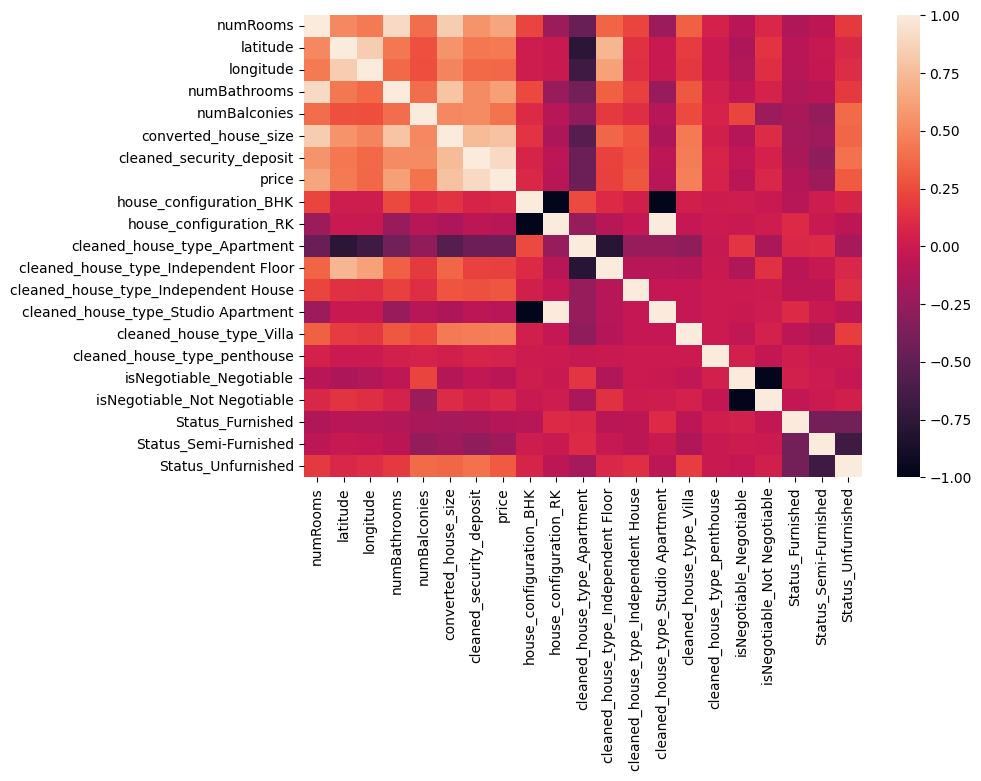

In [38]:
print(finall_df.columns)
import seaborn as sns
from matplotlib import pyplot as plt
correlation = finall_df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(correlation)
plt.show()

In [39]:
finall_df.describe()


,numRooms,latitude,longitude,numBathrooms,numBalconies,converted_house_size,cleaned_security_deposit,price,house_configuration_BHK,house_configuration_RK,...,cleaned_house_type_Independent Floor,cleaned_house_type_Independent House,cleaned_house_type_Studio Apartment,cleaned_house_type_Villa,cleaned_house_type_penthouse,isNegotiable_Negotiable,isNegotiable_Not Negotiable,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,1.391000e+04,1.391000e+04,13910.000000,13910.000000,...,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,2.350252,22.380579,74.710460,2.317398,0.700072,1722.942703,2.659185e+05,1.084971e+05,0.968799,0.031201,...,0.240403,0.029907,0.031201,0.038749,0.000216,0.091733,0.908267,0.197628,0.398850,0.403523
std,1.103383,4.660315,2.181421,1.011036,0.993353,1672.692701,6.748326e+05,1.934349e+05,0.173866,0.173866,...,0.427343,0.170336,0.173866,0.193003,0.014685,0.288658,0.288658,0.398224,0.489679,0.490621
min,1.000000,17.468220,18.497896,0.000000,0.000000,150.000000,0.000000e+00,1.500000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.611296,72.965080,2.000000,0.000000,720.000000,0.000000e+00,1.800000e+04,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,19.148081,73.895599,2.000000,0.000000,1050.000000,0.000000e+00,3.300000e+04,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,28.553211,77.152527,3.000000,2.000000,1800.000000,9.000000e+04,9.000000e+04,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,12.000000,31.106586,91.792137,10.000000,8.000000,14521.000000,1.140101e+07,3.010101e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
xx = finall_df.drop(columns = ['price']).values
yy = finall_df['price'].values

In [41]:
xx_train, yy_train, xx_test, yy_test = train_test_split(xx,yy,test_size=0.2,random_state=42)
model1 = LinearRegression()
print(xx_train.shape)

(11128, 20)


In [42]:
xx_train.reshape(1,-1)
yy_train.reshape(1,-1)


array([[ 1.        , 28.59799194, 77.23619843, ...,  0.        ,
         1.        ,  0.        ]], shape=(1, 55640))

In [43]:
print(yy_train)

[[ 1.         28.59799194 77.23619843 ...  1.          0.
   0.        ]
 [ 1.         19.36698532 72.86917877 ...  0.          1.
   0.        ]
 [ 1.         18.58762932 73.98764801 ...  0.          0.
   1.        ]
 ...
 [ 2.         28.53285027 77.26477814 ...  0.          0.
   1.        ]
 [ 1.         19.2348175  72.96658325 ...  0.          1.
   0.        ]
 [ 2.         19.05621338 72.90248108 ...  0.          1.
   0.        ]]


In [44]:
print("Shape of X train: ", xx_train.shape )
print("Shape of y train: ", yy_train.shape )

Shape of X train:  (11128, 20)
Shape of y train:  (2782, 20)


In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xx_train = sc.fit_transform(xx_train)
yy_train = sc.transform(yy_train)

In [46]:
xx_train

array([[ 0.59176052,  1.33145998,  1.16175612, ..., -0.49668405,
        -0.811431  ,  1.211817  ],
       [-1.22532311, -0.70772281, -0.82151594, ..., -0.49668405,
         1.23239068, -0.82520711],
       [-1.22532311, -0.81137948, -0.37433899, ..., -0.49668405,
         1.23239068, -0.82520711],
       ...,
       [-0.3167813 , -0.68845798, -0.81118205, ..., -0.49668405,
        -0.811431  ,  1.211817  ],
       [ 1.50030234,  1.3377176 ,  1.16303121, ..., -0.49668405,
         1.23239068, -0.82520711],
       [ 0.59176052, -0.69293597, -0.81849634, ..., -0.49668405,
         1.23239068, -0.82520711]], shape=(11128, 20))

In [47]:
model1.fit(xx_train,xx_test)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
yy_pred = model1.predict(sc.transform(yy_train))

In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(yy_test, yy_pred)
print("R² Score:", r2)


R² Score: -0.04705200025450029


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [51]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(xx_train, xx_test)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [52]:
y_rf_pred = rf_model.predict(sc.transform(yy_train))


In [53]:
r2 = r2_score(yy_test, y_rf_pred)
rmse = np.sqrt(mean_squared_error(yy_test, y_rf_pred))

print("Random Forest R²:", r2)
print("Random Forest RMSE:", rmse)


Random Forest R²: -0.10947687714659193
Random Forest RMSE: 202699.23507414688


In [54]:
print("Train R²:", rf_model.score(xx_train, xx_test))
print("Test  R²:", rf_model.score(yy_train, yy_test))

Train R²: 0.9847188043313062
Test  R²: 0.9691388862896684


In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score


print("R²:", r2_score(yy_test, y_rf_pred))
print("MSE:", mean_squared_error(yy_test, y_rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(yy_test, y_rf_pred)))
print("MAE:", mean_absolute_error(yy_test, y_rf_pred))



R²: -0.10947687714659193
MSE: 41086979899.64426
RMSE: 202699.23507414688
MAE: 88864.5110140583


In [56]:
print(rf_model.predict(xx_train[2].reshape(1,-1)))
print(xx_test[2])

[13022.67406205]
13000.0


In [57]:
import pickle

file_name = "../models/Scaler.sav"
pickle.dump(sc, open(file_name, 'wb'))

In [58]:
import pickle

file_name = "../models/RandomForestModel.sav"
pickle.dump(rf_model, open(file_name, 'wb'))